# 02-noisy-circle

Read input x and y values from [data/noisy-circle.csv](data/noisy-circle.csv) and estimate circle parameters using [numpy.linalg.lstsq](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.lstsq.html) (same as 01-noisy-line except that linearization is required for non linear equations)


k=0: X=[0.99990975 2.00127594 2.64928201] (loss=1080.849850030818)
k=1: X=[0.99990975 2.00127594 3.08049201] (loss=1080.8498500308153)
k=2: X=[0.99990975 2.00127594 3.05031143] (loss=1080.8498500308144)
k=3: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308158)
k=4: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308167)
k=5: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308162)
k=6: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308167)
k=7: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308162)
k=8: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308167)
k=9: X=[0.99990975 2.00127594 3.05016212] (loss=1080.8498500308162)


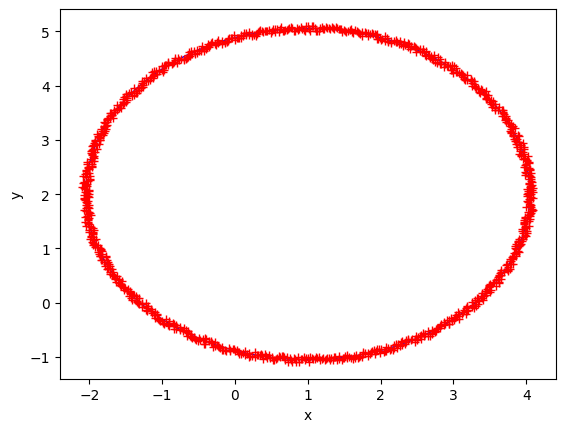

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
xy=np.loadtxt(open("data/noisy-circle.csv", "rb"), delimiter=",", skiprows=1)
x_vals=xy[:,0]
y_vals=xy[:,1]

def estimate_circle(x,y):
    # F(X) = ( x - cx ) ^ 2 + ( y - cy ) ^ 2 - r^2

    # X0 estimation
    X = np.array([0.0,0.0,1.0])

    # F(X0) + dX * F'(X0) = 0
    # dF(X) / dcx = - 2 * ( x - cx )
    # dF(X) / dcy = - 2 * ( y - cy )
    # dF(X) / dr  = - 2 * r
    num_epoch = 10
    for k in range(num_epoch):
        FX0 = np.zeros(x.size)
        A   = np.zeros((x.size,3))
        for i in range(x.size):
            FX0[i] = ( x[i] - X[0] )**2 + ( y[i] - X[1] )**2 - X[2]**2
            A[i,0] = - 2 * ( x[i] - X[0] )
            A[i,1] = - 2 * ( y[i] - X[1] )
            A[i,2] = - 2 * X[2]

        dX, residual = np.linalg.lstsq(A,-FX0,rcond=None)[:2]
        X = X + dX
        loss=np.square(residual).sum()
        print(f'k={k}: X={X} (loss={loss})')
    return X

X = estimate_circle(x_vals,y_vals)

# Plot results
plt.plot(x_vals, y_vals, 'r+', label='data')
plt.xlabel('x')
plt.ylabel('y')
circle = plt.Circle((X[0], X[1]), X[2], color='b', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()